Kostic, Aleksa 52228237

Mandt

CS 178

1 June 2021

# Clustering (50 points)

In this problem, you will experiment with two clustering algorithms implemented in the updated mltools package:
k-means and agglomerative clustering

## .
Load the standard Iris dataset, select the first two features, and ignore the class (or target) variables. Plot the data and see for yourself how “clustered” you think it looks. Include the plot, say how many clusters you think exist, and briefly explain why. (There are multiple reasonable answers to this question.) (5 points)

In [2]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt

In [5]:
iris = np.genfromtxt("data/iris.txt", delimiter=None)
Y = iris[:,-1] # target value (iris species) is the last column
X = iris[:,0:2] # features 1 and 2
X.shape

(148, 2)

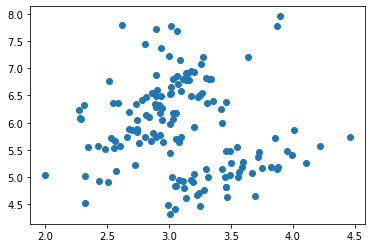

In [7]:
plt.plot(X[:,0],X[:,1],'o')

It seems like there are only two, *maybe* three clusters. The two clusters would be the immediate glance of a sparcity between the bottom right and the top left portion of the graph. Three would be within the top-left cluster, looking like there are two concentrated areas within the top left.

## .
Run k-means on the first two features of the Iris data, for k = 2, k = 5, and k = 20. Try multiple (at least 5) different initializations for each k, and check to see whether they find the same solution; if not, pick the one with the best score. For the best clustering for each candidate k, create a plot with the data colored by assignment, and the cluster centers. You can plot the points colored by cluster assignments z using ml.plotClassify2D(None,X,z) . (You will need to also plot the cluster centers yourself.) (15 points)

In [81]:
K = [2,5,20]

outputs = []

for k in K:
    learner = ml.cluster.kmeans(X, k, init = 'random', max_iter = 20)
    outputs.append(learner)
    learner = ml.cluster.kmeans(X, k, init = 'farthest', max_iter = 20)
    outputs.append(learner)
    learner = ml.cluster.kmeans(X, k, init = 'random', max_iter = 50)
    outputs.append(learner)
    learner = ml.cluster.kmeans(X, k, init = 'farthest', max_iter = 50)
    outputs.append(learner)
    learner = ml.cluster.kmeans(X, k, init = 'random', max_iter = 100)
    outputs.append(learner)

In [83]:
costs = []
for i in range(0,15):
    costs.append(outputs[i][2])


[57.877648396983034, 57.87966196118197, 57.877648396983034, 57.87966196118197, 57.877648396983034, 21.32551761594483, 26.773907034561482, 20.886682200353754, 20.954630196254048, 25.179420471732268, 6.7643295629563704, 4.542673580785835, 6.930552747684456, 4.860337821795849, 6.69582486197805]


In [84]:
best_indices = []
for i in range(0,15,5):
    best_indices.append(costs.index(min(costs[i:i+5])))

_**red crosses (+) are the centers of each cluster**_

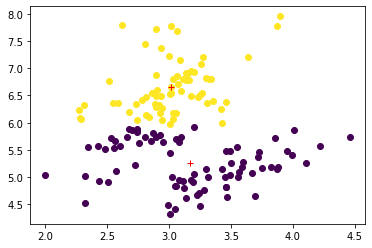

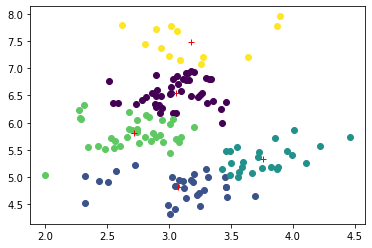

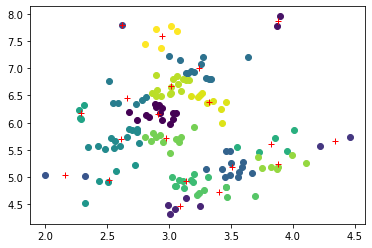

In [102]:
for i in best_indices:
    ml.plotClassify2D(None,X,outputs[i][0])
    # print("length of c:", len(outputs[i][1]))
    # print("type of c", type(outputs[i][1]))
    # print("outputs[i][1]",outputs[i][1])
    for j in range(len(outputs[i][1])):
        plt.plot(outputs[i][1][j][0], outputs[i][1][j][1], 'r+')
    
    plt.show()


## .

Run agglomerative clustering on the first two features of the Iris data, first using single linkage and then again using complete linkage, using the algorithms implemented in ml.cluster.agglomerative from cluster.py ). For each linkage criterion, plot the data colored by their assignments to 2, 5, and 20 clusters. (Agglomerative clustering does not require an initialization, so there is no need to run methods multiple times.) (20 points)

```{python3}
agglomerative(X, K, method, join)
Perform hierarchical agglomerative clustering.

Parameters
----------
X : numpy array
    N x M array of data to be clustered.
K : int
    The number of clusters into which data should be grouped.
method : str (optional)
    str that specifies the method to use for calculating distance between
    clusters. Can be one of: 'min', 'max', 'means', or 'average'.
join : numpy array (optional)
    N - 1 x 3 that contains a sequence of joining operations. Pass to avoid
    reclustering for new X.

Returns (tuple)
-------
z    : N x 1 array of cluster assignments.
join : N - 1 x 3 array that contains the sequence of joining operations
    peformed by the clustering algorithm.
```

============	k=2	method=min	=============


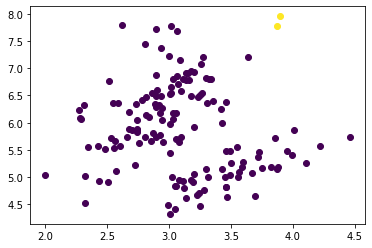

============	k=2	method=max	=============


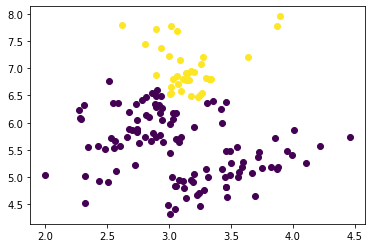

============	k=5	method=min	=============


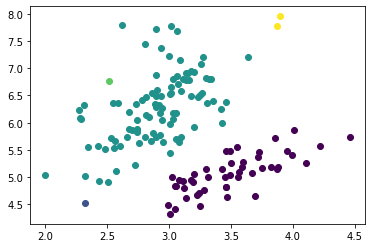

============	k=5	method=max	=============


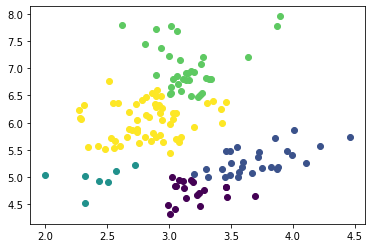

============	k=20	method=min	=============


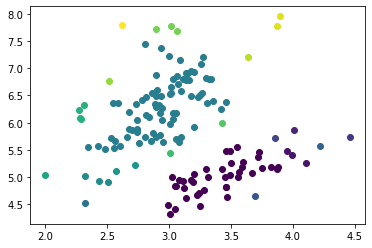

============	k=20	method=max	=============


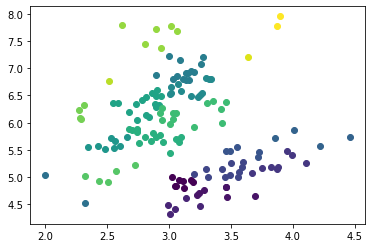

In [113]:
methods = ['min', 'max']

for k in K:
    for m in methods:
        learner = ml.cluster.agglomerative(X, k, method = m)
        print(f"============\tk={k}\tmethod={m}\t=============")
        ml.plotClassify2D(None,X,learner[0])
        plt.show()
        print("=====================================================")

## .
A key difference I see with the two methods at k = 20 is that K-means clustering seems to find clusters that I would find personally visually whereas agglomerative clustering doesn't seem as intuitive with it's choice of clustering. However, at k=2 and k=5, the two approaches seem to produce somewhat similar results. The agglomerative method, though, when using single linkage, creates dominant clusters and minor clusters unlike k-means, whereas using complete linkage creates somewhat equally dominant clusters similar to k-means.

# EigenFaces (50 points)

In class, we discussed how PCA has been applied to faces, and showed some example results. Here, you’ll explore
this representation yourself. First, load the data and display a few faces to better understand the data format:

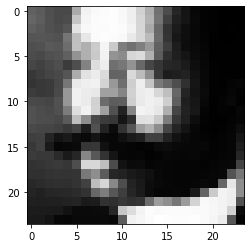

In [3]:
X = np.genfromtxt("data/faces.txt", delimiter = None)
plt.figure()

img = np.reshape(X[0,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray") # display image patch

## .
Subtract the mean of the face images (X0 = X − µ) to make your data zero-mean. (The mean should be of the same dimension as a face, 576 pixels.) Plot the mean face as an image. (5 points)

In [4]:
X_0 = np.zeros(X.shape)

mu = np.mean(X,axis=0)

for i in range(X.shape[0]):
    X_0[i] = X[i] - mu

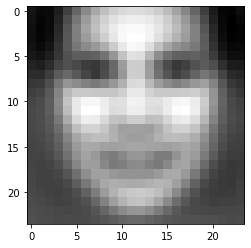

In [5]:
mean_img = np.reshape(mu,(24,24))
plt.imshow( mean_img.T  , cmap="gray")

## .
Use ```scipy.linalg.svd``` to take the SVD of the data, so that $X_0 = U \cdot \text{diag}(S)\cdot V_h$. Since the number of faces is larger than the dimension of each face, there are at most 576 non-zero singular values; use the ```full_matrices=False``` argument to avoid using a lot of memory. As in the slides, then compute ```W = U.dot( np.diag(S) )``` so that $X_0 \approx W \cdot V_h$. Print the shapes of $W$ and $V_h$. (10 points)

In [6]:
import scipy
from scipy import linalg

In [7]:
# returns U, s, Vh
U, s, Vh = scipy.linalg.svd(X_0, full_matrices = False)

In [9]:
W = U.dot( np.diag(s) )
print("Shape of W:", W.shape)
print("Shape of Vh:", Vh.shape)

Shape of W: (4916, 576)
Shape of Vh: (576, 576)


## .
For $K = 1, \dots ,30$, compute the approximation to $X_0$ given by the first K eigenvectors (or eigenfaces): $\hat(X)_0 = W[:,: K] \cdot V_h[: K,:]$. For each $K$, compute the mean squared error in the SVD’s approximation, ```np.mean( (``` $X_0 − \hat{X}_0)$ ```**2 )```. Plot these MSE values as a function of $K$. (10 points)

Text(0, 0.5, 'MSE at K = k')

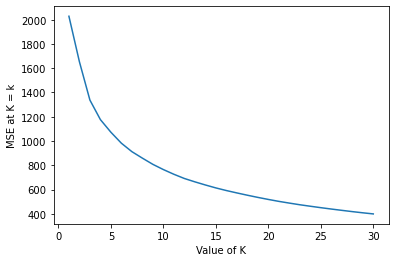

In [16]:
K = range(1,31)
MSE = []

for k in K:
    X_0_hat = W[:,:k].dot(Vh[:k,:])
    MSE.append(np.mean( (X_0 - X_0_hat)**2))
    
plt.plot(K,MSE)
plt.xlabel("Value of K")
plt.ylabel("MSE at K = k")

## .
Display the first three principal directions of the data, by computing $\mu+\alpha V_h[j,:]$ and $\mu-\alpha V_h[j,:]$, where $\alpha$ is a scale factor (we suggest setting $\alpha$ to ```2*np.median(np.abs(W[:,j]))```, to match the scale of the data). These should be vectors of length $24^2 = 576$, so you can reshape them and view them as “face images” just like the original data. They should be similar to the images in lecture. (10 points)


principal direction 1
mu + alpha*Vh[1,:]


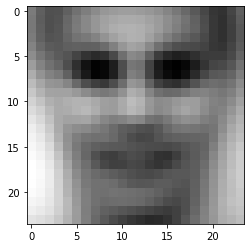

mu - alpha*Vh[1,:]


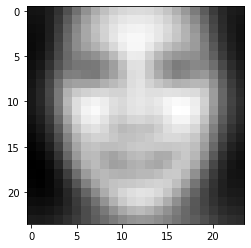

principal direction 2
mu + alpha*Vh[2,:]


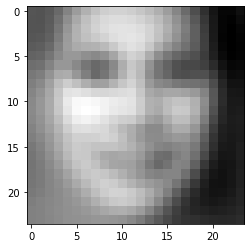

mu - alpha*Vh[2,:]


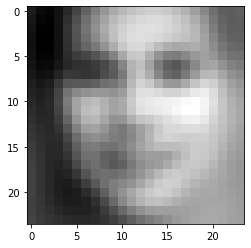

principal direction 3
mu + alpha*Vh[3,:]


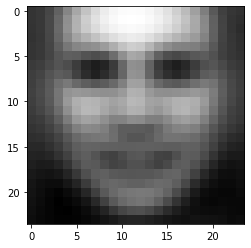

mu - alpha*Vh[3,:]


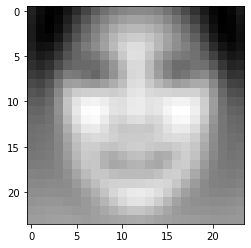

In [23]:
for j in [1,2,3]:
    
    alpha = 2*np.median(np.abs(W[:,j]))
    q = mu + alpha*Vh[j,:]
    r = mu - alpha*Vh[j,:]
    
    print("="*40)
    print(f"principal direction {j}")
    
    print(f"mu + alpha*Vh[{j},:]")
    img = np.reshape(q,(24,24)) # convert vectorized data to 24x24 image patches
    plt.imshow( img.T , cmap="gray")
    plt.show()
    
    print(f"mu - alpha*Vh[{j},:]")
    img = np.reshape(r,(24,24)) # convert vectorized data to 24x24 image patches
    plt.imshow( img.T , cmap="gray")
    plt.show()
    

## .
Choose any two faces and reconstruct them using the first K principal directions, for $K = 5, 10, 50, 100$. Plot the reconstructed faces as images. (5 points)

image at index 0 for first 5 principle components


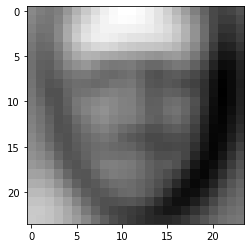

image at index 1 for first 5 principle components


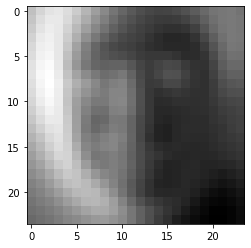


image at index 0 for first 10 principle components


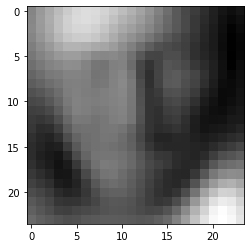

image at index 1 for first 10 principle components


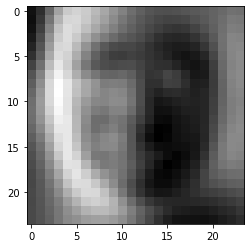


image at index 0 for first 50 principle components


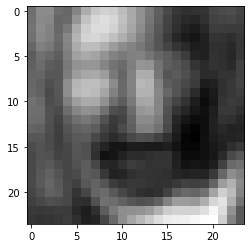

image at index 1 for first 50 principle components


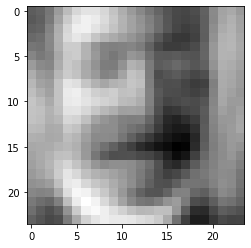


image at index 0 for first 100 principle components


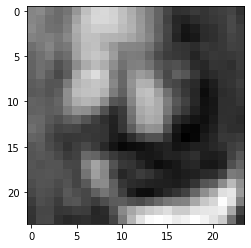

image at index 1 for first 100 principle components


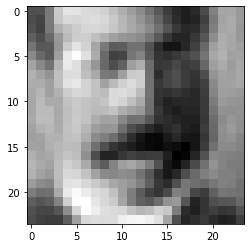

In [34]:
K = [5, 10, 50, 100]
outputs = []

for k in K:
    Xhat_k = U[:,:k].dot(np.diag(s[:k])).dot(Vh[:k,:])
    print("="*40)
    print(f"image at index 0 for first {k} principle components")
    img = np.reshape(Xhat_k[0],(24,24)) # convert vectorized data to 24x24 image patches
    plt.imshow( img.T , cmap="gray")
    plt.show()
    print(f"image at index 1 for first {k} principle components")
    img = np.reshape(Xhat_k[1],(24,24)) # convert vectorized data to 24x24 image patches
    plt.imshow( img.T , cmap="gray")
    plt.show()
    print()

## .
Methods like PCA are often called “latent space” methods, as the coefficients can be interpreted as a new geometric space in which the data are represented. To visualize this, choose 25 of the faces, and display them as images with the coordinates given by their coefficients on the first two principal components:


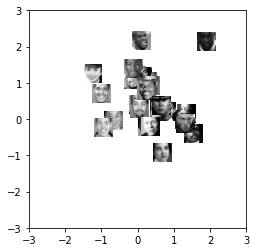

In [35]:
idx = range(0,25)

import mltools.transforms

coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
plt.figure()

for i in idx:
    # compute where to place image (scaled W values) & size
    loc = (coord[i,0], coord[i,0] + 0.5, coord[i,1], coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T, cmap = "gray", extent = loc )
    plt.axis( (-3, 3, -3, 3) ) # set axis to reasonable scale

This is a good way to gain intuition for what the PCA latent representation captures. (10 points)

# Statement of Collaboration (0 points)

I did not collaborate for this homework. The only thing I had to look up was how to check if I have scipy, and how to import scipy.linalg.